In [395]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [396]:
data = pd.read_csv('data/500_Person_Gender_Height_Weight_Index.csv')
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [397]:
X = data.iloc[:,1:3]
X.head()

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61


# K - Means

## Step 1 : Get Random Centroids

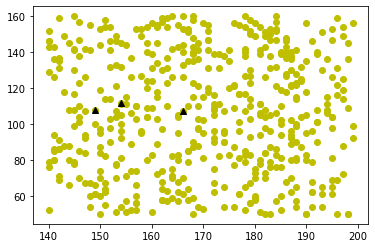

In [398]:
def get_random_centroids(X, k):
    cent =(X.sample(n = k))
    return cent
centroids = np.array(get_rand_centroids(X, k = 3))
X = np.array(X)
plt.scatter(X[:,0],X[:,1],color='y')
plt.scatter(centroids[:,0],centroids[:,1],color='black',marker='^')

In [399]:
X2 = data.iloc[:,1:3].values

In [400]:
X = data.iloc[:,1:3]
X.head()

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61


### step 2 : Assign Clusters
### step 3 : Move centroid
### step 4 : if current centroid == previous centroid stop

In [401]:
class K_means:
    
    def __init__(self,n_clusters,max_iter):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        
      
    def fit_predict(self,X):
        index = rd.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = np.array(X[index])
        for i in range(self.max_iter):
            cg = self.find_cluster(X)
        return cg
    
    def find_cluster(self,X):
        eucl_dist = []
        cluster = []
        for row in X:
            for cent in self.centroids :
                di = row - cent
                eud = np.sqrt(np.dot(di,di))
                eucl_dist.append(eud)
            min_dist = min(eucl_dist)
            pos = eucl_dist.index(min_dist)
            cluster.append(pos)
            eucl_dist.clear()
            
        return np.array(cluster) 

In [402]:
#centroids = np.array(get_rand_centroids(X, k = 4))
km = K_means(n_clusters=4,max_iter=100)
labels = km.fit_predict(np.array(X))

In [403]:
dicts = {
    'height':X.iloc[:,0],
    'weight':X.iloc[:,1],
    'cluster':labels}
cluster_data = pd.DataFrame(dicts)

In [404]:
df.sample(5)

,height,weight,cluster
378,154,96,1
93,177,61,2
146,194,106,2
472,178,65,2
388,157,66,1


In [405]:
X2[labels==0,1]

array([ 96,  87, 104,  61, 104,  92,  90, 103,  81,  80, 101,  51,  79,
       107,  97,  67,  64,  95,  80,  81, 108,  56,  76,  72, 105,  89,
        92,  70,  88,  83,  96,  59,  82,  51,  80,  75, 100, 104,  90,
        75, 105, 104,  96,  69, 105, 106,  66,  70,  90,  96,  60,  57,
       104, 108,  87,  96,  79,  54,  85,  79,  98,  52,  60, 103,  84,
       102, 105,  99,  76, 101,  78, 106,  67,  80, 102,  94, 100,  74,
        97,  73,  80,  84,  95,  85, 100, 105,  94, 108,  74,  93,  89,
       104,  87,  99,  96,  67,  84,  86, 109,  82,  90,  70,  78,  86,
        81,  78,  81,  65, 110,  85,  61,  98,  90,  89,  70,  58, 104,
        52,  84,  86, 103,  57,  83,  94,  80,  75,  94, 107,  74,  52,
       100,  74, 105,  68,  83,  88,  76,  92,  82,  81,  88,  67,  99,
        95, 104,  66,  54,  92,  85,  71, 102,  71,  68,  62,  56,  57,
        71,  92,  83, 106,  58,  60,  83,  88,  51,  90, 103,  80,  94,
        67,  62,  63,  95,  91,  96,  87,  83,  66,  50,  58,  7

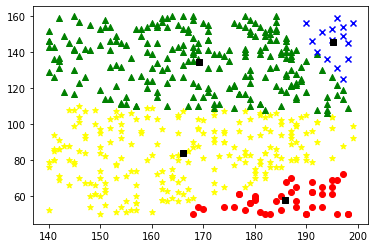

In [406]:
color = ['yellow','green','red','blue']
marker = ['*','^','o','x']
for i in range(len(color)):
    plt.scatter(X2[labels==i,0],X2[labels==i,1],color =color[i],marker=marker[i])
    plt.scatter(X2[labels==i,0].mean(),X2[labels==i,1].mean(),color='black',marker='s')

# K-means++

In [431]:
def kpp_centroids(X,k):
    centroids = X.sample()
    i=1
    d = []
    while i!=k:
        max_d = [0,0]
        for c,r in centroids.iterrows():
            dt = np.sqrt((X['Height']-r['Height'])**2+(X['Weight']-r['Weight'])**2)
            if max(dt)>max(max_d):
                max_d = dt
        X = pd.concat([X,max_d],axis=1)
        idt = X.iloc[:,i+1].idxmax()
        print(idt)
        max_coor = pd.DataFrame(X.iloc[idt][["Height", "Weight"]]).T
        centroids = pd.concat([centroids,max_coor])
        X = X.drop(idt)
        i+=1
    return centroids
        

In [432]:
X = data.iloc[:,1:3]
X.head()

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61


In [433]:
kpp_centroids(X,5)

213
151
100
389


,Height,Weight
226,166.0,70.0
213,196.0,159.0
151,140.0,52.0
100,199.0,156.0
392,183.0,76.0


In [430]:
kpp_centroids(X,5)

     Height  Weight          0
0       174      96  66.128662
1       189      87  80.529498
2       185     110  58.821765
3       195     104  69.656299
4       149      61  97.020616
..      ...     ...        ...
495     150     153   5.099020
496     184     121  49.578221
497     141     136  24.166092
498     150      95  63.007936
499     173     131  34.828150

[500 rows x 3 columns]
     Height  Weight          0           0
0       174      96  66.128662   51.884487
1       189      87  80.529498   38.078866
2       185     110  58.821765   61.392182
3       195     104  69.656299   54.083269
4       149      61  97.020616   50.219518
..      ...     ...        ...         ...
495     150     153   5.099020  113.635382
496     184     121  49.578221   72.367120
497     141     136  24.166092  103.174609
498     150      95  63.007936   65.795137
499     173     131  34.828150   84.770278

[499 rows x 4 columns]
     Height  Weight          0           0           0
0       1

,Height,Weight
362,151.0,158.0
85,198.0,50.0
248,188.0,90.0
205,150.0,87.0
112,190.0,135.0


In [423]:
def get_kmeans_pp_centroids(X1,k = 5):
    centroids = X1.sample()
    print(centroids)
    i = 1
    dist = []
    while i != k:
        max_dist = [0,0]
        #go through the centroids
        for index, row in centroids.iterrows():
            #calculate distance of every centroid with every other data point 
            d = np.sqrt((X1["Height"] - row["Height"])**2 +(X1["Weight"] - row["Weight"])**2)
            #check which centroid has a max distance with another point
            if max(d) > max(max_dist):
                max_dist = d
            
        X1 = pd.concat([X1, max_dist], axis = 1)
        idx = X1.iloc[:,i+1].idxmax()
        max_coor = pd.DataFrame(X1.iloc[idx][["Height", "Weight"]]).T
        centroids = pd.concat([centroids,max_coor])
        X1 = X1.drop(idx)
        i+=1
    return centroids